# Iris Species Detection using Decision Tree

This notebook loads the Iris dataset, performs Exploratory Data Analysis (EDA), trains a Decision Tree Classifier, and allows interactive prediction.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Configure plots
sns.set_style("whitegrid")
%matplotlib inline

## 1. Load Data
Load the Iris dataset and convert it to a Pandas DataFrame for analysis.

In [10]:
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (150, 5)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Exploratory Data Analysis (EDA)

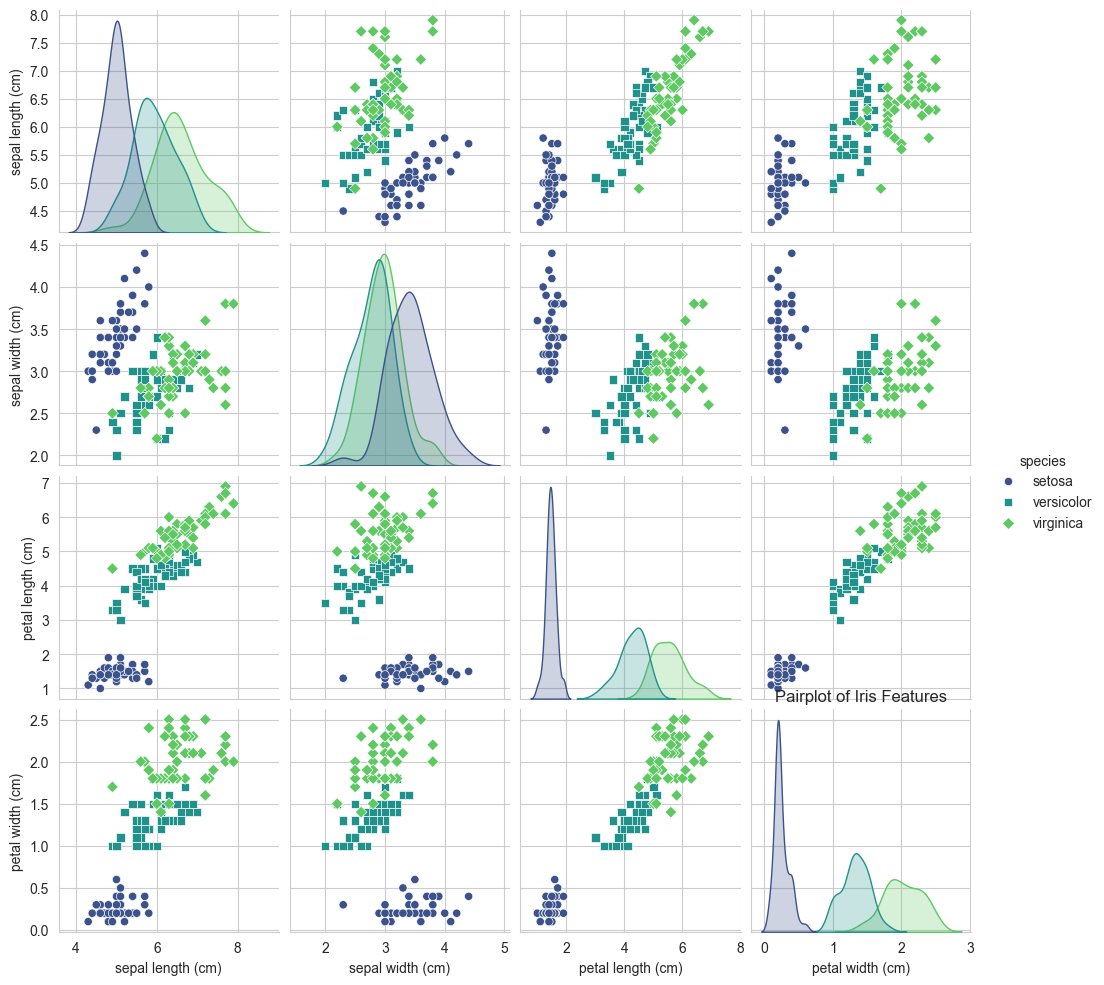

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='species', markers=['o', 's', 'D'], palette='viridis')
plt.title("Pairplot of Iris Features")
plt.show()

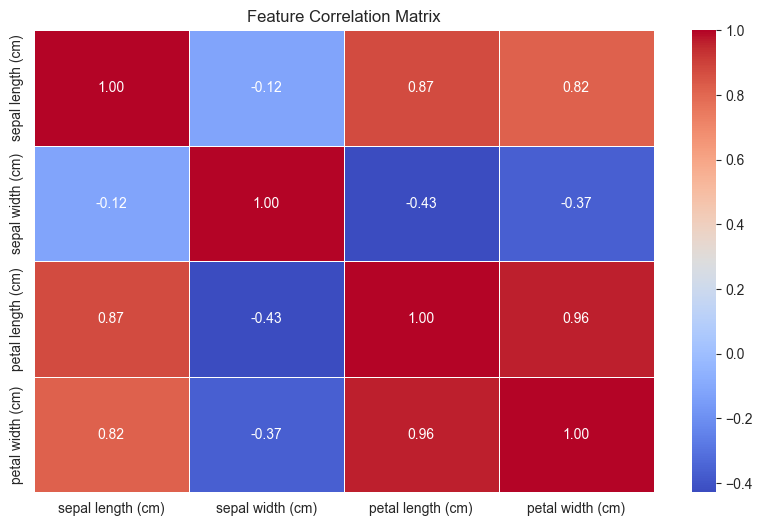

In [12]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18584\3741929834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='pastel')


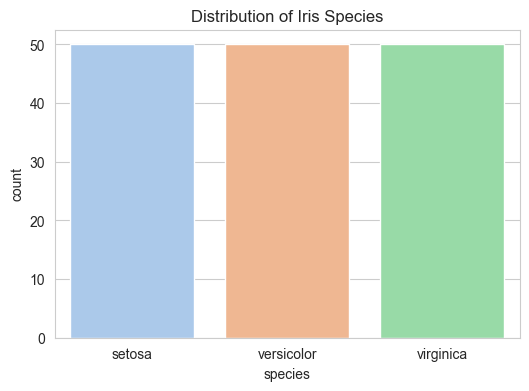

In [13]:
# Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette='pastel')
plt.title("Distribution of Iris Species")
plt.show()

## 3. Model Training: Decision Tree

In [14]:
# Split data
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


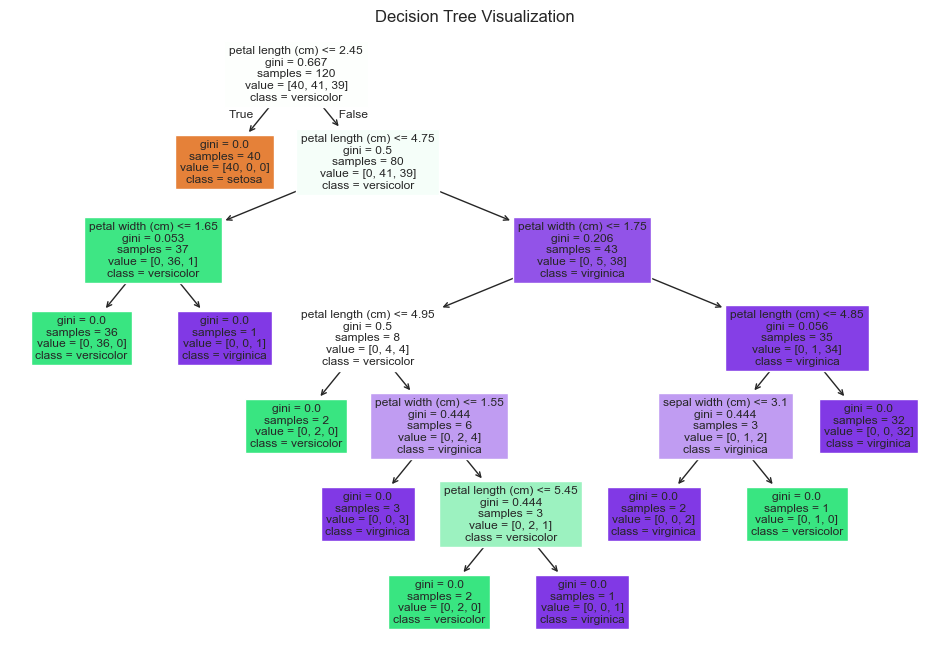

In [15]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## 4. Interactive Prediction

In [16]:
print("Please enter the following details to predict the Iris species:")

try:
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    prediction = clf.predict(user_input)
    predicted_class = iris.target_names[prediction][0]
    
    print(f"\nBased on the input, the predicted Iris species is: {predicted_class.capitalize()}")
except ValueError:
    print("Invalid input! Please enter numeric values.")

Please enter the following details to predict the Iris species:

Based on the input, the predicted Iris species is: Setosa
